In [12]:
from typing import TypedDict


class GraphState(TypedDict):
    number_1: int
    number_2: int
    operation: str
    output: int


class GraphState2(TypedDict):
    number_1: int
    number_2: int
    operation_1: str
    number_3: int
    number_4: int
    operation_2: str
    output_1: int
    output_2: int


# Edge names
ADDER_EDGE: str = "ADDER_EDGE"
SUBTRACTER_EDGE: str = "SUBTRACTER_EDGE"

In [13]:
def adder_node(state: GraphState) -> GraphState:
    """Simple node that add two number and update the output into state"""

    state["output"] = state["number_1"] + state["number_2"]
    return state


def subtracter_node(state: GraphState) -> GraphState:
    """Simple node that subtract 2nd number from 1st number and update the output into state"""

    state["output"] = state["number_1"] - state["number_2"]
    return state


def decide_next_node(state: GraphState):
    """This simple node will be selected next node of the graph"""

    match state["operation"]:
        case "+":
            return ADDER_EDGE
        case "-":
            return SUBTRACTER_EDGE
        case _:
            return None

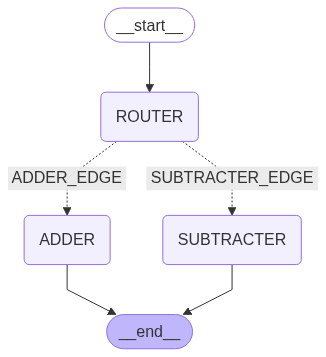

In [14]:
from langgraph.graph import StateGraph, START, END

ROUTER_NODE: str = "ROUTER"
ADDER_NODE: str = "ADDER"
SUBTRACTER_NODE: str = "SUBTRACTER"

state_graph = StateGraph(GraphState)
state_graph.add_node(ROUTER_NODE, lambda state: state)  # passthrough function
state_graph.add_node(ADDER_NODE, adder_node)
state_graph.add_node(SUBTRACTER_NODE, subtracter_node)

state_graph.add_edge(START, ROUTER_NODE)
state_graph.add_conditional_edges(
    ROUTER_NODE,
    decide_next_node,
    {ADDER_EDGE: ADDER_NODE, SUBTRACTER_EDGE: SUBTRACTER_NODE},
)
state_graph.add_edge(ADDER_NODE, END)
state_graph.add_edge(SUBTRACTER_NODE, END)

graph = state_graph.compile()
graph

In [15]:
initial_state = GraphState(number_1=10, number_2=20, operation="+", output=0)
print(graph.invoke(initial_state))

{'number_1': 10, 'number_2': 20, 'operation': '+', 'output': 30}


In [16]:
initial_state = GraphState(number_1=30, number_2=20, operation="-", output=0)
print(graph.invoke(initial_state))


{'number_1': 30, 'number_2': 20, 'operation': '-', 'output': 10}


In [17]:
# Edge names
ADDER_EDGE_2: str = "ADDER_EDGE_2"
SUBTRACTER_EDGE_2: str = "SUBTRACTER_EDGE_2"


def adder_node(state: GraphState2) -> GraphState2:
    """Simple node that add two number and update the output into state"""

    state["output_1"] = state["number_1"] + state["number_2"]
    return state


def subtracter_node(state: GraphState2) -> GraphState2:
    """Simple node that subtract 2nd number from 1st number and update the output into state"""

    state["output_1"] = state["number_1"] - state["number_2"]
    return state


def decide_next_node(state: GraphState2):
    """This simple node will be selected next node of the graph"""

    match state["operation_1"]:
        case "+":
            return ADDER_EDGE
        case "-":
            return SUBTRACTER_EDGE
        case _:
            return None


def adder_node_2(state: GraphState2) -> GraphState2:
    """Simple node that add two number and update the output into state"""

    state["output_2"] = state["number_3"] + state["number_4"]
    return state


def subtracter_node_2(state: GraphState2) -> GraphState2:
    """Simple node that subtract 2nd number from 1st number and update the output into state"""

    state["output_2"] = state["number_3"] - state["number_4"]
    return state


def decide_next_node_2(state: GraphState2):
    """This simple node will be selected next node of the graph"""

    match state["operation_2"]:
        case "+":
            return ADDER_EDGE_2
        case "-":
            return SUBTRACTER_EDGE_2
        case _:
            return None

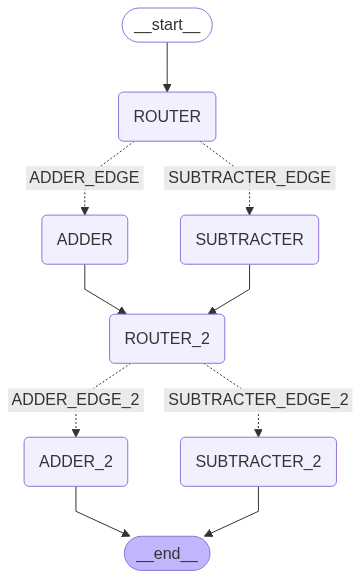

In [18]:
from langgraph.graph import StateGraph, START, END

ROUTER_NODE: str = "ROUTER"
ADDER_NODE: str = "ADDER"
SUBTRACTER_NODE: str = "SUBTRACTER"

ROUTER_NODE_2: str = "ROUTER_2"
ADDER_NODE_2: str = "ADDER_2"
SUBTRACTER_NODE_2: str = "SUBTRACTER_2"

state_graph = StateGraph(GraphState2)
state_graph.add_node(ROUTER_NODE, lambda state: state)  # passthrough function
state_graph.add_node(ADDER_NODE, adder_node)
state_graph.add_node(SUBTRACTER_NODE, subtracter_node)

state_graph.add_edge(START, ROUTER_NODE)
state_graph.add_conditional_edges(
    ROUTER_NODE,
    decide_next_node,
    {ADDER_EDGE: ADDER_NODE, SUBTRACTER_EDGE: SUBTRACTER_NODE},
)

state_graph.add_node(ROUTER_NODE_2, lambda state: state)
state_graph.add_node(ADDER_NODE_2, adder_node_2)
state_graph.add_node(SUBTRACTER_NODE_2, subtracter_node_2)

state_graph.add_edge(ADDER_NODE, ROUTER_NODE_2)
state_graph.add_edge(SUBTRACTER_NODE, ROUTER_NODE_2)
state_graph.add_conditional_edges(
    ROUTER_NODE_2,
    decide_next_node_2,
    {ADDER_EDGE_2: ADDER_NODE_2, SUBTRACTER_EDGE_2: SUBTRACTER_NODE_2},
)
state_graph.add_edge(ADDER_NODE_2, END)
state_graph.add_edge(SUBTRACTER_NODE_2, END)

graph = state_graph.compile()
graph


In [20]:
initial_state = GraphState2(
    number_1=10,
    number_2=20,
    operation_1="+",
    number_3=40,
    number_4=20,
    operation_2="-",
    output_1=0,
    output_2=0,
)
graph.invoke(initial_state)

{'number_1': 10,
 'number_2': 20,
 'operation_1': '+',
 'number_3': 40,
 'number_4': 20,
 'operation_2': '-',
 'output_1': 30,
 'output_2': 20}